[[ 5.46650630e-01  5.75214468e-01 -5.14584520e+01]
 [-5.82942864e-01  5.32075406e-01  3.87234668e+02]
 [ 1.55975511e-05  1.30196419e-06  1.00000000e+00]]


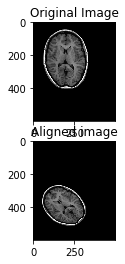

In [16]:
# The idea is come from: https://blog.csdn.net/wzhrsh/article/details/106412216
#Import the liberaries
from __future__ import print_function
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
 
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15
 
 
def affine_registration(input, reference):
 
  # Convert images to grayscale
  Gray_input = cv2.cvtColor(input, cv2.COLOR_BGR2GRAY)
  Gray_reference = cv2.cvtColor(reference, cv2.COLOR_BGR2GRAY)
 
  # Detect ORB features and compute descriptors.
  orb = cv2.ORB_create(MAX_FEATURES)
  keypoints1, descriptors1 = orb.detectAndCompute(Gray_input, None)
  keypoints2, descriptors2 = orb.detectAndCompute(Gray_reference, None)
 
  # Match features.
  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
  matches = matcher.match(descriptors1, descriptors2, None)
 
  # Sort matches by score
  matches.sort(key=lambda x: x.distance, reverse=False)
 
  # Remove not so good matches
  numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
  matches = matches[:numGoodMatches]
 
  # Draw top matches
  imMatches = cv2.drawMatches(input, keypoints1, reference, keypoints2, matches, None)
 
  # Extract location of good matches
  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)
 
  for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt
 
  # Find homography
  h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
 
  # Use homography
  height, width, channels = im2.shape
  im1Reg = cv2.warpPerspective(input, h, (width, height))
 
  return im1Reg, matrix
 
 
if __name__ == '__main__':
 
    # Read the input image
    imFilename = "img1.jpg"
    input = cv2.imread(imFilename, cv2.IMREAD_COLOR)
    
    # Read reference image
    refFilename = "img3.jpg"
    reference = cv2.imread(refFilename, cv2.IMREAD_COLOR)


    # Registered image will be resotred in imReg.
    # The estimated homography will be stored in h.
    imReg, matrix = alignImages(input, reference)

    # Print the homography matrix
    print(matrix)
    
    # Plot the original image
    plt.subplot(2,1,1), plt.imshow(input)
    plt.title('Original Image')
    
    # Plot the aligned image with the translation matrix
    aligned_image = imReg
    plt.subplot(2,1,2), plt.imshow(aligned_image)
    plt.title('Aligned image')